<h2><center>ASSIGNMENT 2</center></h2>
<h2><center>DEEP ASHISH JARIWALA, JAYDEEP SINGH</center></h2>
<h2><center>GROUP - 31</center></h2>
<h2><center>Q: CM2</center></h2>

## COVID DATASET

#### IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from mlxtend.plotting import plot_confusion_matrix

#### IMPORTING THE DATASET

In [2]:
dataset = pd.read_csv("covid_train.csv")
dataset.head(5)

,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
0,50s,MALE,NO KNOWN EPI LINK,Oakville,NaN,43.413997,-79.744796,Resolved
1,20s,FEMALE,CC,Guelph,NaN,43.524881,-80.233743,Not Resolved
2,90s,FEMALE,OB,Barrie,Yes,44.410713,-79.686306,Resolved
3,20s,FEMALE,MISSING INFORMATION,Toronto,NaN,43.656591,-79.379358,Resolved
4,90s,FEMALE,OB,Ottawa,Yes,45.345665,-75.763912,Fatal


#### EXPLORATORY DATA ANALYSIS

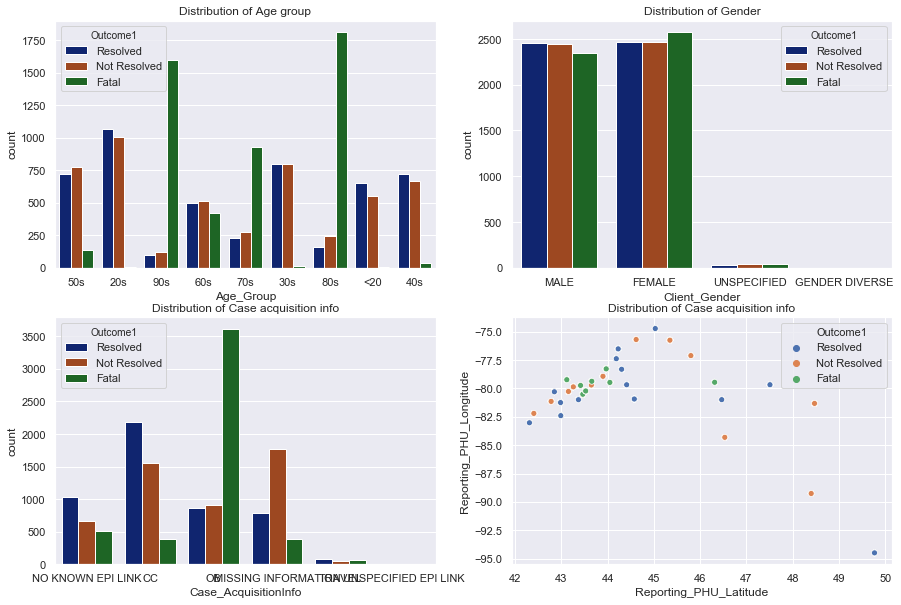

In [3]:
fig = plt.figure(figsize=(15,10))

plt.subplot(221)
plt.title("Distribution of Age group")
sns.countplot(x='Age_Group', hue='Outcome1', data = dataset, palette = 'dark')

plt.subplot(222)
plt.title("Distribution of Gender")
sns.countplot(x='Client_Gender', hue='Outcome1', data = dataset, palette = 'dark')

plt.subplot(223)
plt.title("Distribution of Case acquisition info")
sns.countplot(x='Case_AcquisitionInfo', hue='Outcome1', data = dataset, palette = 'dark')

plt.subplot(224)
plt.title("Distribution of Case acquisition info")
sns.scatterplot(x = 'Reporting_PHU_Latitude', y = 'Reporting_PHU_Longitude', hue = 'Outcome1', data = dataset)

<p><b>Important features observed from the plots:</b></p>
<ul>
            <li>The age group of 70s, 80s and 90s has observed the highest fatal outcomes compared to other classes.</li>
            <li>There is particular pattern observed in the gender histogram plot. All the classes of outcomes are equally divided among males and females. The unspecified also has an almost equal distribution of target.</li>
            <li>The case aquisition info provides one interesting pattern, The Outbreak(OB) class in acquissition info has the highest fatal outcomes.</li>
            <li>An interesting pattern is observed in longitude v/s latitude plot, The box covered by latitude(43,44) and longitude(-77.5,-82.5) has the cases with most fatal outcomes. This region can be a red zone.</li>
</ul>

####  DATA CLEANING AND PREPROCESSING 

In [4]:
print(dataset.isna().sum())

# replacing NaN in Outbreak_Related with NO 
dataset['Outbreak_Related'] = dataset['Outbreak_Related'].fillna("No") 

# Dropping NaN values in Age_Group
dataset = dataset.dropna()

# Dropping unspecified gender values
dataset = dataset[dataset['Client_Gender'] != 'UNSPECIFIED']
dataset.head(5)

Age_Group                     6
Client_Gender                 0
Case_AcquisitionInfo          0
Reporting_PHU_City            0
Outbreak_Related           9020
Reporting_PHU_Latitude        0
Reporting_PHU_Longitude       0
Outcome1                      0
dtype: int64


,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
0,50s,MALE,NO KNOWN EPI LINK,Oakville,No,43.413997,-79.744796,Resolved
1,20s,FEMALE,CC,Guelph,No,43.524881,-80.233743,Not Resolved
2,90s,FEMALE,OB,Barrie,Yes,44.410713,-79.686306,Resolved
3,20s,FEMALE,MISSING INFORMATION,Toronto,No,43.656591,-79.379358,Resolved
4,90s,FEMALE,OB,Ottawa,Yes,45.345665,-75.763912,Fatal


In [5]:
dataset_features = dataset.iloc[:,:-1]
dataset_target = dataset.iloc[:, -1]

dataset_features['Age_Group'] = dataset_features['Age_Group'].replace({'<20': 1, '20s': 2, '30s': 3 , '40s': 4, '50s': 5, '60s': 6, '70s': 7, '80s': 8, '90s': 9})

categorical_cols = ['Client_Gender','Case_AcquisitionInfo','Reporting_PHU_City','Outbreak_Related']
# Create the encoder.
encoder = OneHotEncoder(categories = "auto", handle_unknown="error", sparse = False, drop= 'first')
# Fit and transform encoder to X
array_hot_encoded = encoder.fit_transform(dataset_features[categorical_cols])
# convert it to a Data Frame
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=dataset_features.index)
# set column names of encoded dataframe
data_hot_encoded.columns = encoder.get_feature_names(categorical_cols)
# concatenate other columns with the encoded columns to get the final datset
data_other_cols = dataset_features.drop(columns=categorical_cols)
dataset_features = pd.concat([data_hot_encoded, data_other_cols], axis=1)
dataset_features.head()


,Client_Gender_GENDER DIVERSE,Client_Gender_MALE,Case_AcquisitionInfo_MISSING INFORMATION,Case_AcquisitionInfo_NO KNOWN EPI LINK,Case_AcquisitionInfo_OB,Case_AcquisitionInfo_TRAVEL,Case_AcquisitionInfo_UNSPECIFIED EPI LINK,Reporting_PHU_City_Belleville,Reporting_PHU_City_Brantford,Reporting_PHU_City_Brockville,...,Reporting_PHU_City_Thunder Bay,Reporting_PHU_City_Timmins,Reporting_PHU_City_Toronto,Reporting_PHU_City_Waterloo,Reporting_PHU_City_Whitby,Reporting_PHU_City_Windsor,Outbreak_Related_Yes,Age_Group,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,43.413997,-79.744796
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,43.524881,-80.233743
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9,44.410713,-79.686306
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,43.656591,-79.379358
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9,45.345665,-75.763912


<p>The following steps are performed as a part of preprocessing the dataset into training set.</p>
<ul>
            <li>Imputation of NaN values in the Outbreak_related columns, all the NaNs are replaced with "No".</li>
            <li>All the values of unspecified gender are removed from the dataset, since the values were very less compared to the total size of the dataset.</li>
            <li>All the remaining NaN values were observed in Age_Group, which were dropped because only 6 values out of 14850 values were missing.</li>
            <li>Label encoding of Age_Group data as it is ordinal type of dataset. Moreover, the age wise ranking is also preserved in case of label encoding.</li>
            <li>Other categorical features (Client_Gender, Case_AcquisitionInfo, Reporting_PHU_City, Outbreak_Related) were transformed using One-Hot Encoding for better results.</li>
</ul>

In [6]:
X, X_test, y, y_test = train_test_split(dataset_features, dataset_target, test_size = 0.15, random_state = 0)

<p> The dataset is splited into training and test using train_test_split method in sklearn. 85% dataset is used for training and then applied to grid search cv(using 10 fold cross validation) to tune the best parameters. The best tuned hyperparameters are used to train the model again and is tested on the 15% test set seperated to get the final accuracy. All the splits and algorithm used are applied with random_state = 0.</p> 
<p>Generally, Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data. In this case, majority of the variables are categorical in nature and the numeric variable shows coordinate location of a point. Therefore, feature scaling is not applied in COVID dataset.</p>

# DECISION TREE CLASSIFICATION ALGORITHM

#### TRAINING THE DATASET AND APPLYING GRID_SEARCH_CV METHOD 

In [7]:
dtclassifier = DecisionTreeClassifier(random_state = 0)
dtclassifier.fit(X, y)

cv = KFold(n_splits=10, random_state=0, shuffle=True)
parameters = [{'max_depth': [3, 5, 10, None]}]
grid_search = GridSearchCV(estimator = dtclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = -1)
grid_search.fit(dataset_features.values, dataset_target.values)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
results = grid_search.cv_results_
print("Best Accuracy obtained for Decision Tree Classifier: {:.2f} %".format(best_accuracy*100))
print("Best Parameters found for Decision Tree Classifier:", best_parameters)

Best Accuracy obtained for Decision Tree Classifier: 66.21 %
Best Parameters found for Decision Tree Classifier: {'max_depth': 10}


<p>The box above shows GRID_SEARCH_CV method to find the best parameters. This method utilizes the concept of K-fold cross validation to evaluate the model on different parameters. This case involves tuning of maximum depth of trees. The best parameters obtained for this case are: maximum depth of 10. The box below shows all the results (for all the folds, mean accuracy, ranked test score among all the splits and computation time for grid search parameter tuning).</p>

In [8]:
results

{'mean_fit_time': array([0.07250628, 0.07509911, 0.08706622, 0.08886116]),
 'std_fit_time': array([0.00553483, 0.00348519, 0.00448301, 0.0157536 ]),
 'mean_score_time': array([0.00259218, 0.00209405, 0.00219438, 0.00249336]),
 'std_score_time': array([0.00048865, 0.00029857, 0.00039841, 0.00066855]),
 'param_max_depth': masked_array(data=[3, 5, 10, None],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 3},
  {'max_depth': 5},
  {'max_depth': 10},
  {'max_depth': None}],
 'split0_test_score': array([0.66508475, 0.67186441, 0.66508475, 0.64067797]),
 'split1_test_score': array([0.64789688, 0.66214383, 0.66485753, 0.65468114]),
 'split2_test_score': array([0.66078697, 0.66621438, 0.67774763, 0.6614654 ]),
 'split3_test_score': array([0.65671642, 0.66485753, 0.66824966, 0.64857531]),
 'split4_test_score': array([0.64993216, 0.65739484, 0.65739484, 0.64925373]),
 'split5_test_score': array([0.64518318, 0.65264586

Text(0.5, 1.0, 'Graph of mean accuracy v/s tree depth')

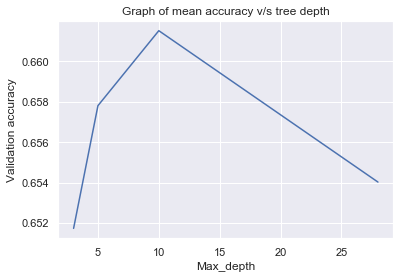

In [9]:
# values taken from GridSearchCV mean_test_score
mean_accuracy = [0.65173768, 0.65779979, 0.66150431, 0.65402516]
depth = [3, 5, 10, 28]

plt.title('Accuracy v/s depth curve gini index as criterion')
sns.lineplot(depth, mean_accuracy)
plt.xlabel("Max_depth")
plt.ylabel("Validation accuracy")
plt.title("Graph of mean accuracy v/s tree depth")

<p>The graph shows variation of accuracy with the changing values of max_depth of the tree, with the highest accuracy observed at max_depth = 10. In this case, max_depth of 28 corresponds to default/None value</p>

The default parameters(max_depth = None) produces a depth of : 28


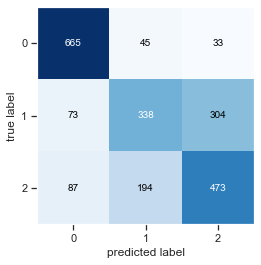

The accuracy obtained on test set with best tuned parameters using decision tree classifier : 66.72694394213381 % 


In [10]:
print(f"The default parameters(max_depth = None) produces a depth of : {dtclassifier.get_depth()}")
dtclassifier_final = DecisionTreeClassifier(max_depth = 10, random_state = 0)
dtclassifier_final.fit(X, y)

y_pred = dtclassifier_final.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()
ac = accuracy_score(y_test, y_pred)
print(f"The accuracy obtained on test set with best tuned parameters using decision tree classifier : {ac*100} % ")

#### THE TREE DIAGRAM IS SHOWN AT THE END

In [11]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(dtclassifier_final, max_depth = 3, out_file = 'tree.dot',feature_names = list(dataset_features.columns))

In [12]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(dtclassifier_final, out_file = 'tree1.dot',feature_names = list(dataset_features.columns))

# RANDOM FOREST CLASSIFICATION ALGORITHM

#### TRAINING THE DATASET AND APPLYING GRID_SEARCH_CV METHOD 

In [13]:
rfclassifier = RandomForestClassifier(random_state = 0)
rfclassifier.fit(X, y)

parameters = [{'n_estimators': [5, 10, 50, 150, 200] , 'max_depth': [3, 5, 10, None]}]
grid_search = GridSearchCV(estimator = rfclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = -1)
grid_search.fit(X, y)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
results = grid_search.cv_results_
print("Best Accuracy obtained for Random Forest Classifier: {:.2f} %".format(best_accuracy*100))
print("Best Parameters found for Random Forest Classifier:", best_parameters)

Best Accuracy obtained for Random Forest Classifier: 66.88 %
Best Parameters found for Random Forest Classifier: {'max_depth': 10, 'n_estimators': 150}


<p>The box above shows GRID_SEARCH_CV method to find the best parameters. This method utilizes the concept of K-fold cross validation to evaluate the model on different parameters. This case involves tuning of maximum depth of trees and number of estimators to be used. The best parameters obtained for this case are: maximum depth of 10 and number of estimators as 200. The box below shows all the results (for all the folds, mean accuracy, ranked test score among all the splits and computation time for grid search parameter tuning).</p>

In [14]:
results

{'mean_fit_time': array([0.06163518, 0.08028443, 0.24484491, 0.68805912, 0.85412037,
        0.05824366, 0.08622437, 0.31515598, 0.89999189, 1.08449814,
        0.07499986, 0.11977932, 0.47673335, 1.40648649, 1.8932348 ,
        0.10601733, 0.18540483, 0.79347637, 2.4683043 , 3.17450755]),
 'std_fit_time': array([0.00721679, 0.00657386, 0.01043429, 0.02370032, 0.01949251,
        0.00190267, 0.00428869, 0.03514491, 0.0583061 , 0.01431589,
        0.00255468, 0.00457981, 0.00994855, 0.0150246 , 0.02280895,
        0.00423325, 0.00390005, 0.01121491, 0.11494969, 0.54603463]),
 'mean_score_time': array([0.00837669, 0.00708134, 0.016256  , 0.03680141, 0.04827096,
        0.00618372, 0.0075309 , 0.02084379, 0.03949387, 0.04896834,
        0.00678227, 0.00817764, 0.02009745, 0.0511626 , 0.06512489,
        0.0073792 , 0.00987246, 0.02702744, 0.07988532, 0.09445348]),
 'std_score_time': array([0.0022834 , 0.00030038, 0.00148236, 0.00257921, 0.00600439,
        0.0005984 , 0.00195022, 0.006408

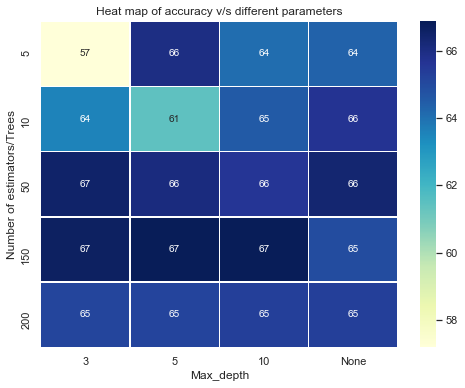

In [15]:
mean_accuracy_score = grid_search.cv_results_['mean_test_score']
arr = np.array(mean_accuracy_score*100)
arr = arr.reshape(5,4)
df = pd.DataFrame(arr, index = ['5','10','50','150','200'], columns = ['3','5','10','None'])

plt.figure(figsize=(8,6))
sns.heatmap(df, annot = True, linewidth = 0.5, cmap = "YlGnBu")
plt.xlabel("Max_depth")
plt.ylabel("Number of estimators/Trees")
plt.title("Heat map of accuracy v/s different parameters")


# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

<p>The heat plot above shows a relationship between number of estimators and maximum depth to obtain tuned parameters. The tuned parameters (max_depth = 10 and number of estimators = 150) shows the maximum accuracy of 67% using GridSearchCV.</p>

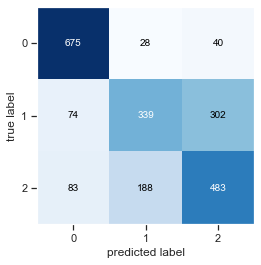

The accuracy obtained on test set with best tuned parameters using random forest : 67.6763110307414 % 


In [16]:
rfclassifier_final = RandomForestClassifier(n_estimators = 150, max_depth = 10, random_state = 0)
rfclassifier_final.fit(X, y)

y_pred = rfclassifier_final.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()
ac = accuracy_score(y_test, y_pred)
print(f"The accuracy obtained on test set with best tuned parameters using random forest : {ac*100} % ")

# GRADIENT BOOSTING CLASSIFICATION ALGORITHM

#### TRAINING THE DATASET AND APPLYING GRID_SEARCH_CV METHOD 

In [17]:
gbclassifier = GradientBoostingClassifier(random_state = 0)
gbclassifier.fit(X, y)

parameters = [{'n_estimators': [5, 10, 50, 150, 200]}]
grid_search = GridSearchCV(estimator = gbclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = -1)
grid_search.fit(X, y)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
results = grid_search.cv_results_
print("Best Accuracy obtained for Gradient Tree Boosting Classifier: {:.2f} %".format(best_accuracy*100))
print("Best Parameters found for Gradient Tree Boosting Classifier:", best_parameters)

Best Accuracy obtained for Gradient Tree Boosting Classifier: 66.88 %
Best Parameters found for Gradient Tree Boosting Classifier: {'n_estimators': 50}


<p>The box above shows GRID_SEARCH_CV method to find the best parameters. This method utilizes the concept of K-fold cross validation to evaluate the model on different parameters. This case involves tuning of maximum depth of trees and number of estimators to be used. The best parameter obtained for this case: number of estimators as 50. The box below shows all the results (for all the folds, mean accuracy, ranked test score among all the splits and computation time for grid search hyperparameter tuning).</p>

In [18]:
results

{'mean_fit_time': array([ 0.31246467,  0.60358527,  3.27294087, 10.07745013, 11.61852195]),
 'std_fit_time': array([0.00292609, 0.00744738, 0.14670216, 0.22873354, 2.14916163]),
 'mean_score_time': array([0.00648236, 0.00688069, 0.01166868, 0.02004659, 0.01994255]),
 'std_score_time': array([0.00049915, 0.0002992 , 0.00045716, 0.00053706, 0.00480297]),
 'param_n_estimators': masked_array(data=[5, 10, 50, 150, 200],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 5},
  {'n_estimators': 10},
  {'n_estimators': 50},
  {'n_estimators': 150},
  {'n_estimators': 200}],
 'split0_test_score': array([0.64884278, 0.64884278, 0.66241022, 0.66400638, 0.65921788]),
 'split1_test_score': array([0.66879489, 0.66799681, 0.6839585 , 0.68156425, 0.68635275]),
 'split2_test_score': array([0.68156425, 0.68156425, 0.68954509, 0.68316042, 0.68794892]),
 'split3_test_score': array([0.63527534, 0.63527534, 0.64405427, 0.6

Text(0.5, 1.0, 'plot of validation accuracy v/s number of estimators')

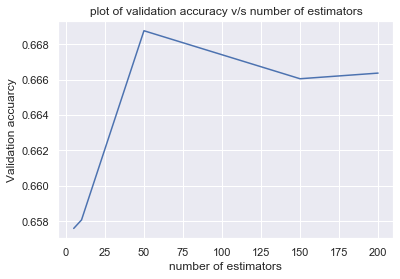

In [19]:
mean_accuracy_score = grid_search.cv_results_['mean_test_score']
estimators = [5, 10, 50, 150, 200]
plt.plot(estimators, mean_accuracy_score)
plt.xlabel("number of estimators")
plt.ylabel("Validation accuarcy")
plt.title("plot of validation accuracy v/s number of estimators")

<p>The graph shows variation of accuracy with the changing values of max_depth of the tree. The maximum accuracy is observed at 50 estimators.</p>

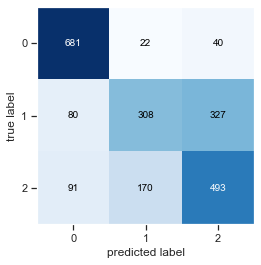

The accuracy obtained on test set with best tuned parameters using gradient boosting : 66.99819168173599 % 


In [20]:
gbclassifier_final = GradientBoostingClassifier(n_estimators = 50, random_state = 0)
gbclassifier_final.fit(X, y)

y_pred = gbclassifier_final.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()
ac = accuracy_score(y_test, y_pred)
print(f"The accuracy obtained on test set with best tuned parameters using gradient boosting : {ac*100} % ")

# COMPARISION OF ALL THE ALGORITHM FOR COVID DATASET

<table>
  <tr>
    <th>Classifier</th>
    <th>Best Parameters</th>
    <th>Average validation Accuracy</th>
    <th>Test Accuracy</th>
    <th>mean fit time(computation time)</th>
  </tr>
  <tr>
    <td>Decision Tree</td>
    <td>Max_depth = 10</td>
    <td>66.21%</td>
    <td>66.72%</td>
    <td>93.8 ms</td>
   </tr>
<tr>
    <td>Random Forest Classifier</td>
    <td>Max_depth = 10, n_estimators = 150</td>
    <td>66.88%</td>
    <td>67.68%</td>
    <td>1177 ms</td>
   </tr>
<tr>
    <td>Gradient Boosting Classifier</td>
    <td>n_estimators = 50</td>
    <td>66.88%</td>
    <td>66.99%</td>
    <td>7212 ms</td>
   </tr>
</table>

<h2>References</h2>

<a>https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html</a>

<a>https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html</a>

<a>https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html</a>

<a>https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree</a>

<a>https://scikit-learn.org/stable/index.html</a>

<a>https://scikit-learn.org/stable/modules/classes.html</a>

<a>https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html</a>

<a>https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html</a>

<a>http://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix/</a>

<a>https://stackoverflow.com/questions/58046129/can-someone-give-a-good-math-stats-explanation-as-to-what-the-parameter-var-smoo</a>

<a>http://seaborn.pydata.org/</a>

<a>https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html</a>

<a>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html</a>

<a>https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html</a>